Total number of patients: 279
Total images - Class 0 (non-IDC): 198738
Total images - Class 1 (IDC): 78786
Total images: 277524
Class distribution - Class 0: 71.61%, Class 1: 28.39%

Summary statistics for images per patient:
       class0_count  class1_count        total
count    279.000000    279.000000   279.000000
mean     712.322581    282.387097   994.709677
std      476.404878    259.236512   550.603474
min       14.000000     10.000000    63.000000
25%      347.500000    104.500000   560.500000
50%      623.000000    198.000000   967.000000
75%      998.500000    369.500000  1362.000000
max     2231.000000   1347.000000  2395.000000


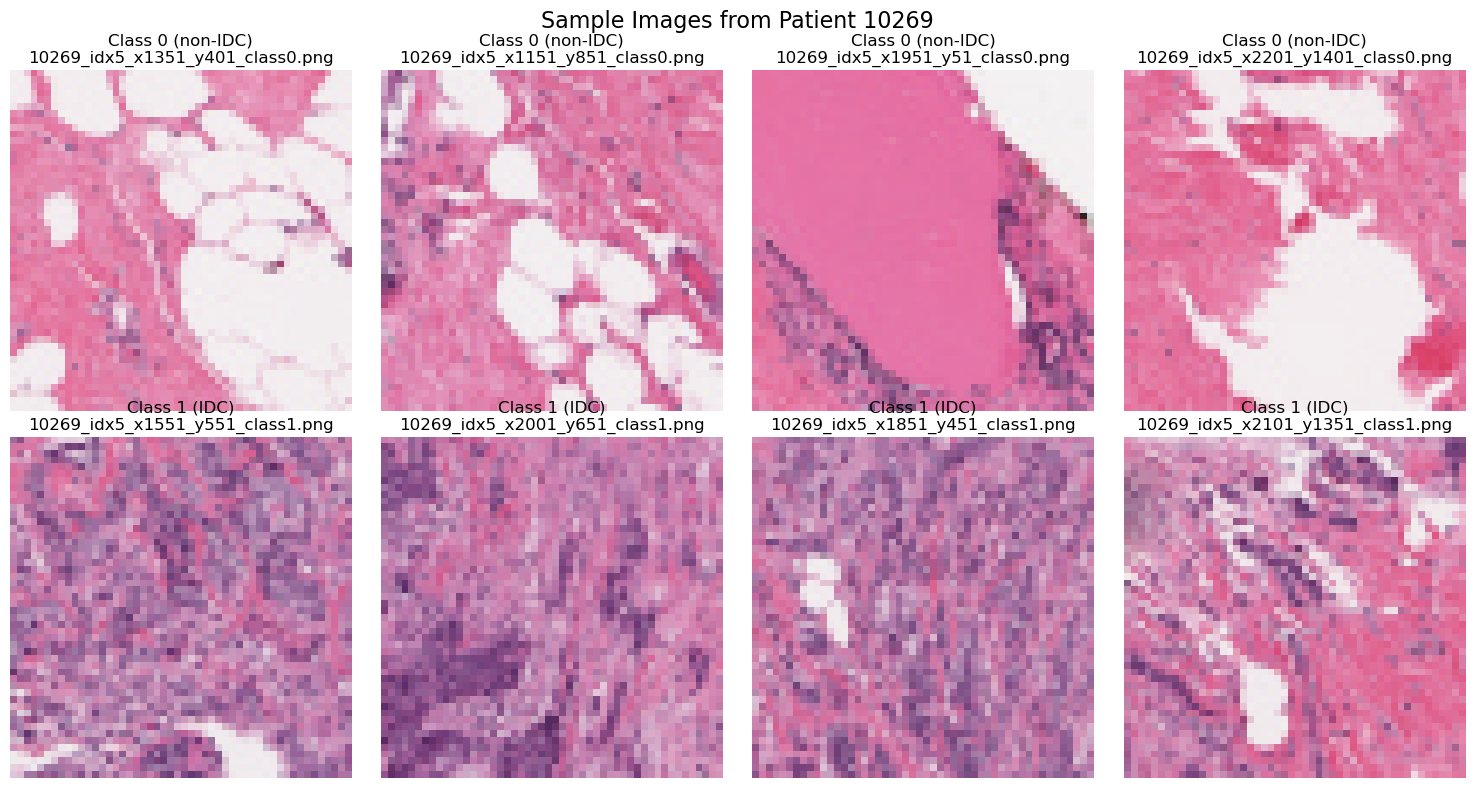

Class 0 image info - Size: (50, 50), Mode: RGB, Format: PNG
Class 1 image info - Size: (50, 50), Mode: RGB, Format: PNG

Sample filename: 9036_idx5_x1051_y2401_class0.png
Filename format: patientID_idx_x-coordinate_y-coordinate_class.png


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import pandas as pd

# Define the data directory
data_dir = '../data'

# Get all patient IDs (folders in the data directory)
patient_ids = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d)) and d.isdigit()]
print(f"Total number of patients: {len(patient_ids)}")

# Count total images for each class
total_class0 = 0
total_class1 = 0
patient_stats = []

for patient_id in patient_ids:
    patient_dir = os.path.join(data_dir, patient_id)
    
    # Count images in class 0 (non-IDC)
    class0_dir = os.path.join(patient_dir, '0')
    class0_count = len(os.listdir(class0_dir)) if os.path.exists(class0_dir) else 0
    total_class0 += class0_count
    
    # Count images in class 1 (IDC)
    class1_dir = os.path.join(patient_dir, '1')
    class1_count = len(os.listdir(class1_dir)) if os.path.exists(class1_dir) else 0
    total_class1 += class1_count
    
    patient_stats.append({
        'patient_id': patient_id,
        'class0_count': class0_count,
        'class1_count': class1_count,
        'total': class0_count + class1_count
    })

# Create a DataFrame for patient statistics
df_stats = pd.DataFrame(patient_stats)
print(f"Total images - Class 0 (non-IDC): {total_class0}")
print(f"Total images - Class 1 (IDC): {total_class1}")
print(f"Total images: {total_class0 + total_class1}")
print(f"Class distribution - Class 0: {total_class0/(total_class0+total_class1):.2%}, Class 1: {total_class1/(total_class0+total_class1):.2%}")

# Display summary statistics
print("\nSummary statistics for images per patient:")
print(df_stats[['class0_count', 'class1_count', 'total']].describe())

# Function to display random samples from each class
def display_samples(num_samples=3):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 8))
    
    # Get random patient
    random_patient = random.choice(patient_ids)
    patient_dir = os.path.join(data_dir, random_patient)
    
    # Display samples from class 0
    class0_dir = os.path.join(patient_dir, '0')
    if os.path.exists(class0_dir) and len(os.listdir(class0_dir)) > 0:
        class0_samples = random.sample(os.listdir(class0_dir), min(num_samples, len(os.listdir(class0_dir))))
        for i, sample in enumerate(class0_samples):
            img_path = os.path.join(class0_dir, sample)
            img = np.array(Image.open(img_path))
            axes[0, i].imshow(img)
            axes[0, i].set_title(f"Class 0 (non-IDC)\n{sample}")
            axes[0, i].axis('off')
    
    # Display samples from class 1
    class1_dir = os.path.join(patient_dir, '1')
    if os.path.exists(class1_dir) and len(os.listdir(class1_dir)) > 0:
        class1_samples = random.sample(os.listdir(class1_dir), min(num_samples, len(os.listdir(class1_dir))))
        for i, sample in enumerate(class1_samples):
            img_path = os.path.join(class1_dir, sample)
            img = np.array(Image.open(img_path))
            axes[1, i].imshow(img)
            axes[1, i].set_title(f"Class 1 (IDC)\n{sample}")
            axes[1, i].axis('off')
    
    plt.suptitle(f"Sample Images from Patient {random_patient}", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print image information for the first sample of each class
    if os.path.exists(class0_dir) and len(os.listdir(class0_dir)) > 0:
        sample_path = os.path.join(class0_dir, class0_samples[0])
        img = Image.open(sample_path)
        print(f"Class 0 image info - Size: {img.size}, Mode: {img.mode}, Format: {img.format}")
        
    if os.path.exists(class1_dir) and len(os.listdir(class1_dir)) > 0:
        sample_path = os.path.join(class1_dir, class1_samples[0])
        img = Image.open(sample_path)
        print(f"Class 1 image info - Size: {img.size}, Mode: {img.mode}, Format: {img.format}")

# Display sample images
display_samples(4)

# Analyze image naming pattern
sample_filename = os.listdir(os.path.join(data_dir, patient_ids[0], '0'))[0]
print(f"\nSample filename: {sample_filename}")
print("Filename format: patientID_idx_x-coordinate_y-coordinate_class.png")